# Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import randint
from sklearn.model_selection import cross_val_score , GridSearchCV, RandomizedSearchCV
from IPython.display import Image
import pydotplus
from sklearn import tree

%matplotlib inline

In [2]:
data = pd.read_csv('Mod_1_tran.csv')

# Data preprocessing

In [3]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Correlation 

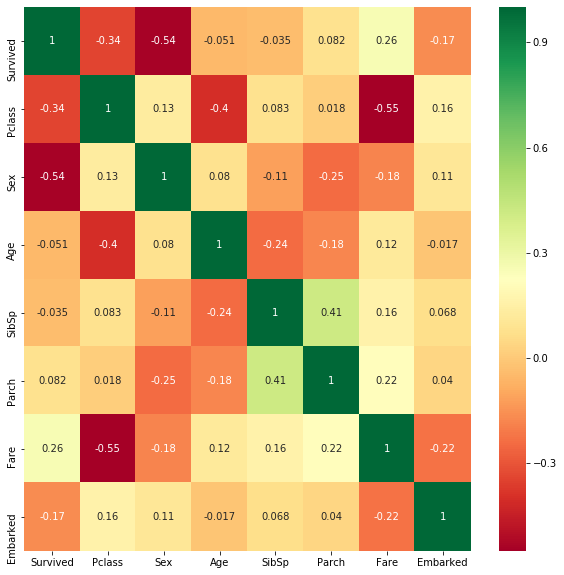

In [4]:
corrmat = data.corr() # Find Corr
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Spilit data**

In [5]:
X = data.drop('Survived',axis=1).values
y = data['Survived'].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Scale data**

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Necessary Function**

In [9]:
# For model evolution
def model_evolution(y_test, y_pred):
    print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
    print("\nAccuracy Score : ",accuracy_score(y_test,y_pred),'\n')
    print("Classification Report : \n",classification_report(y_test, y_pred))
   

In [10]:
# create heatmap for confusion matrix
def heatmap_cm(confusion_matrix):
    sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [11]:
# Grid search for finding best parameters for model
def grid_search(x,y,classifier,parameter,cv):
    grid_sr = GridSearchCV(estimator=classifier,param_grid=parameter,cv=cv,scoring='accuracy',n_jobs=-1)
    grid_sr.fit(x,y)
    print('Grid search best accuracy score : ',grid_sr.best_score_)
    print('Grid search best parameter : ',grid_sr.best_params_)

In [12]:
# Randomized grid search

def random_grid_search(x,y,classifier,parameter,cv):
    grid_sr = RandomizedSearchCV(estimator=classifier,param_distributions=parameter,cv=cv,scoring='accuracy',n_jobs=-1)
    grid_sr.fit(x,y)
    print('Random Grid search best accuracy score : ',grid_sr.best_score_)
    print('Random Grid search best parameter : ',grid_sr.best_params_)
    

# Machine Learning Algorithm

The Target is the binary classification. So we need to use classifier.

In [13]:
def Model(X,y,algorithm,test):
    clf = algorithm.fit(X,y)
    pred = clf.predict(test)
    
    return clf, pred

**Logistic Regression**

In [14]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

In [15]:
classifier,y_pred = Model(X=X_train,y=y_train,algorithm=LogisticRegression(),test=X_test)

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
model_evolution(y_test, y_pred)

Confusion Matrix : 
 [[92 13]
 [19 55]]

Accuracy Score :  0.8212290502793296 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [17]:
print("K-Fold Cross validation score : ",cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10).mean())


K-Fold Cross validation score :  0.7977967806841046


C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

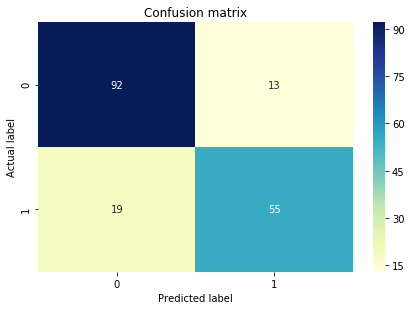

In [18]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,y_pred)))

* **Currectly classified : 147**
* **Wrong classified : 32**

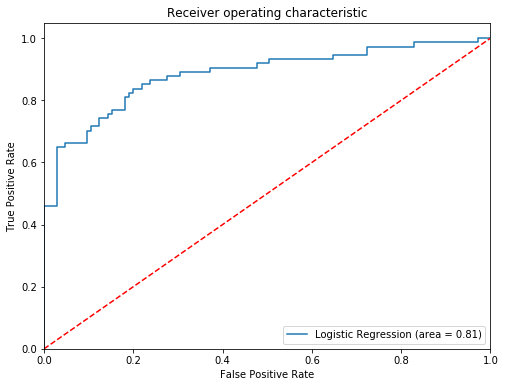

In [19]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Improve model using Grid search**

In [20]:
param_log = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

In [21]:
grid_search(x=X_train,y=y_train,classifier=classifier,parameter=param_log,cv=10)

Grid search best accuracy score :  0.800561797752809
Grid search best parameter :  {'C': 5, 'penalty': 'l2'}


C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**The model accuracy are almost same as before .. So, our model is not much improved**

**SVM**

In [22]:
# import SVM algorithm
from sklearn.svm import SVC

In [23]:
clf_svc,pred_svc = Model(X=X_train,y=y_train,algorithm=SVC(probability=True),test=X_test)

In [24]:
model_evolution(y_test, pred_svc)

Confusion Matrix : 
 [[93 12]
 [21 53]]

Accuracy Score :  0.8156424581005587 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [25]:
print("K-Fold Cross validation score : ",cross_val_score(estimator=clf_svc,X=X_train,y=y_train,cv=10).mean())

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-p

K-Fold Cross validation score :  0.8187664878157837


C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


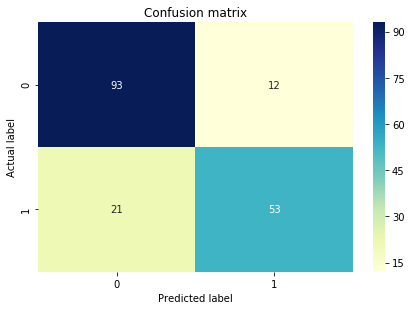

In [26]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_svc)))

* **Currectly classified : 146**
* **Wrong classified : 33**

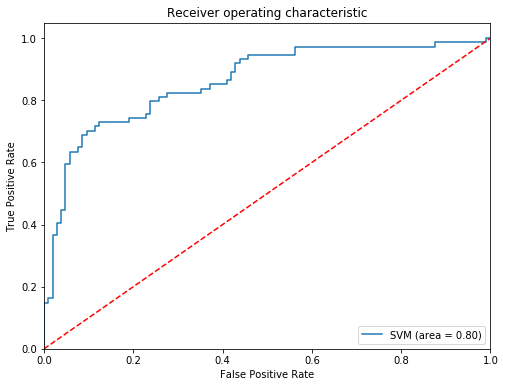

In [27]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, pred_svc)
fpr, tpr, thresholds = roc_curve(y_test, clf_svc.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

SVM has given better result, better accuracy and better curve than Logistic Regression

In [28]:
param_svc ={'kernel': ['linear', 'rbf', 'poly'],
            'C': [0.001, 0.10, 0.1, 10],
            'degree' : [0,3,6]}
            

In [29]:
grid_search(x=X_train,y=y_train,classifier=clf_svc,parameter=param_svc,cv=2)

Grid search best accuracy score :  0.8132022471910112
Grid search best parameter :  {'C': 10, 'degree': 0, 'kernel': 'rbf'}


**The default model gives us better result**

**SGDClassifier**

In [30]:
from sklearn.linear_model import SGDClassifier 

In [31]:
clf_sgd,pred_sgd = Model(X= X_train,y=y_train,algorithm=SGDClassifier(loss= 'log'),test=X_test)

In [32]:
model_evolution(y_test,pred_sgd)

Confusion Matrix : 
 [[86 19]
 [25 49]]

Accuracy Score :  0.7541899441340782 

Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.82      0.80       105
           1       0.72      0.66      0.69        74

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



In [33]:
print("K-Fold Cross validation score : ",cross_val_score(estimator=clf_sgd,X=X_train,y=y_train,cv=10).mean())

K-Fold Cross validation score :  0.7782131678962665


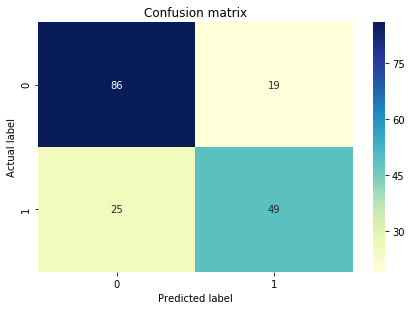

In [34]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_sgd)))

* **Currectly classified : 135**
* **Wrong classified : 44**

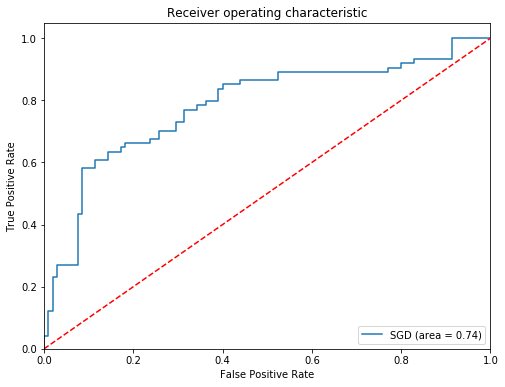

In [35]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, pred_sgd)
fpr, tpr, thresholds = roc_curve(y_test, clf_sgd.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='SGD (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [36]:
param_sgd= {
    'alpha': [.0001, .001, .01, .1, 1, 1.1, 1.2, 1.3], # learning rate
    'max_iter': [500,1000,1500,2000,2500], # number of epochs
    'loss': [ 'hinge', 'log', 'modified_huber','squared_hinge', 'perceptron','squared_epsilon_insensitive'],
    'penalty': ['none', 'l2', 'l1','elasticnet']
    
}

In [37]:
grid_search(x=X_train,y=y_train,classifier=clf_sgd,parameter=param_sgd,cv=10)

Grid search best accuracy score :  0.8089887640449438
Grid search best parameter :  {'alpha': 0.1, 'loss': 'log', 'max_iter': 1500, 'penalty': 'l2'}


C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [70]:
updated_sgd_clf = SGDClassifier(alpha=.1,loss='log',max_iter=1500,penalty='l2')

In [71]:
clf_sgd_1, pred_sgd_1 = Model(X= X_train,y=y_train,algorithm=updated_sgd_clf,test=X_test)

In [72]:
model_evolution(y_test,pred_sgd_1)

Confusion Matrix : 
 [[91 14]
 [22 52]]

Accuracy Score :  0.7988826815642458 

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



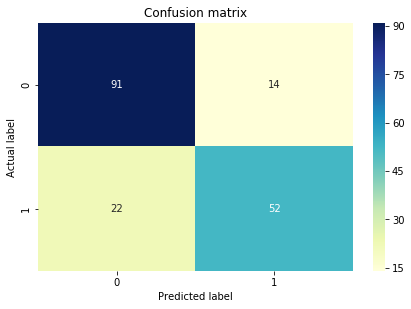

In [73]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_sgd_1)))

* **Currectly classified : 143**
* **Wrong classified : 36**

**We got better result after parameter tuning still it not better then previous algorithm**

**Decision Tree**

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
clf_tree,pred_tree =Model(X= X_train,y=y_train,algorithm=DecisionTreeClassifier(),test=X_test)

In [40]:
model_evolution(y_test,pred_tree)

Confusion Matrix : 
 [[83 22]
 [18 56]]

Accuracy Score :  0.776536312849162 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       105
           1       0.72      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



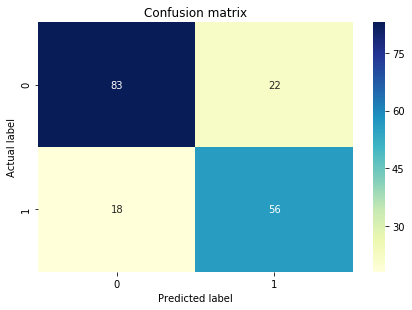

In [41]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_tree)))

* **Currectly classified : 139**
* **Wrong classified : 40**

In [42]:
print("K-Fold Cross validation score : ",cross_val_score(estimator=clf_tree,X=X_train,y=y_train,cv=10).mean())

K-Fold Cross validation score :  0.7752962217750949


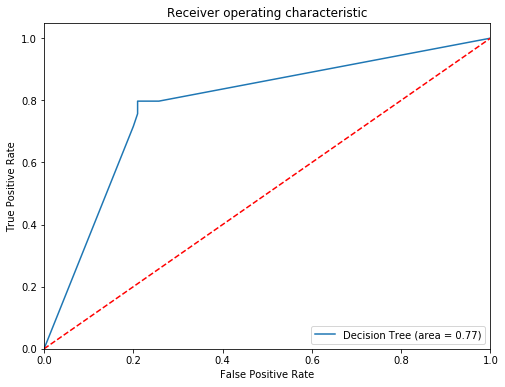

In [43]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, pred_tree)
fpr, tpr, thresholds = roc_curve(y_test, clf_tree.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [79]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [80]:
feature =['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [81]:
target = 'Survived'

In [82]:
# This function will create pdf and png file of the model
def decision_tree_visualization(clf_tree,feature,target):
    dot_data = tree.export_graphviz(clf_tree,out_file=None,feature_names=feature,class_names=target)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_pdf("data_dis_1.pdf")
    graph.write_png("data_dis_1.png")
    

In [83]:
decision_tree_visualization(clf_tree,feature,target)

In [48]:
param_distree = {'criterion' : ['gini','entropy'],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
                 'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
                 'random_state':[123]
}

In [49]:
grid_search(x=X_train,y=y_train,classifier=clf_tree,parameter=param_distree,cv=10)

Grid search best accuracy score :  0.8314606741573034
Grid search best parameter :  {'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 13, 'random_state': 123}


C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [50]:
random_grid_search(x=X_train,y=y_train,classifier=clf_tree,parameter=param_distree,cv=10)

Random Grid search best accuracy score :  0.8047752808988764
Random Grid search best parameter :  {'random_state': 123, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'criterion': 'gini'}


**Grid search gives us better accuracy**

Lets try with best parameters and observe esult

In [16]:
upadated_clf_distree =DecisionTreeClassifier(random_state=123,min_samples_split=13,min_samples_leaf=2,
                                                               max_features='auto',criterion='entropy')

In [17]:
clf_tree_1,pred_tree_1 =Model(X= X_train,y=y_train,algorithm=upadated_clf_distree,test=X_test)

In [18]:
model_evolution(y_test,pred_tree_1)

Confusion Matrix : 
 [[93 12]
 [21 53]]

Accuracy Score :  0.8156424581005587 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



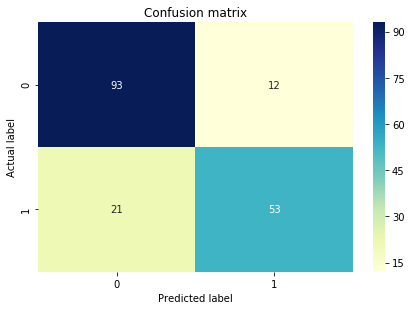

In [19]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_tree_1)))

* **Currectly classified : 146**
* **Wrong classified : 33**

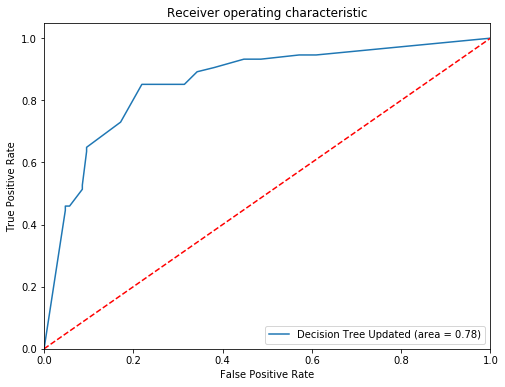

In [78]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, pred_tree_1)
fpr, tpr, thresholds = roc_curve(y_test, clf_tree_1.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Decision Tree Updated (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Random Forest**

In [55]:
from sklearn.ensemble import RandomForestClassifier 

In [56]:
clf_rf, pred_rf = Model(X= X_train,y=y_train,algorithm=RandomForestClassifier(),test=X_test)

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [57]:
model_evolution(y_test,pred_rf)

Confusion Matrix : 
 [[88 17]
 [16 58]]

Accuracy Score :  0.8156424581005587 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.77      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



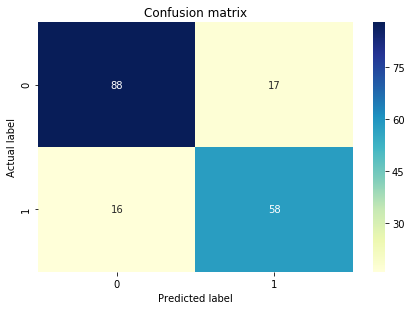

In [58]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_rf)))

* **Currectly classified : 146**
* **Wrong classified : 33**

In [59]:
print("K-Fold Cross validation score : ",cross_val_score(estimator=clf_rf,X=X_train,y=y_train,cv=10).mean())

K-Fold Cross validation score :  0.7852358596020567


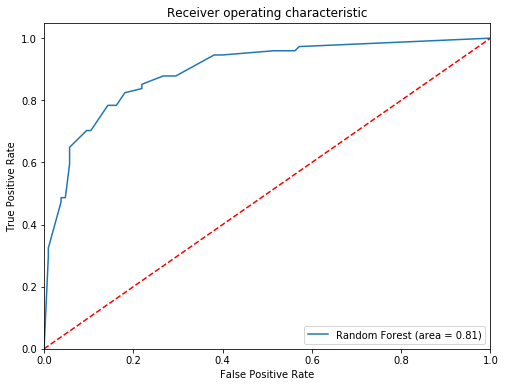

In [60]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, clf_rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [61]:
param_rf ={'criterion' : ['gini','entropy'],'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [62]:
random_grid_search(x=X_train,y=y_train,classifier=clf_rf,parameter=param_rf,cv=5)

Random Grid search best accuracy score :  0.8216292134831461
Random Grid search best parameter :  {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'gini', 'bootstrap': True}


In [87]:
updated_clf_rf = RandomForestClassifier(n_estimators=800,min_impurity_split=10,min_samples_leaf=1,max_features='sqrt',
                                        max_depth = 50, criterion = 'gini',bootstrap=True)

In [88]:
clf_rf_1,pred_rf_1 = Model(X=X_train,y=y_train,algorithm=updated_clf_rf,test=X_test)

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn

In [89]:
model_evolution(y_test,pred_rf_1)

Confusion Matrix : 
 [[105   0]
 [ 74   0]]

Accuracy Score :  0.5865921787709497 

Classification Report : 
               precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


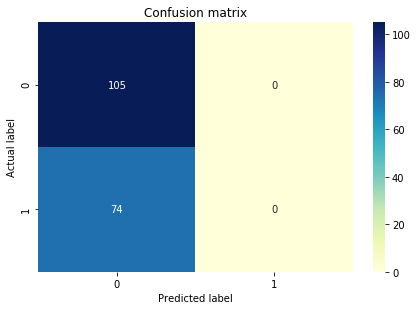

In [90]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_rf_1)))

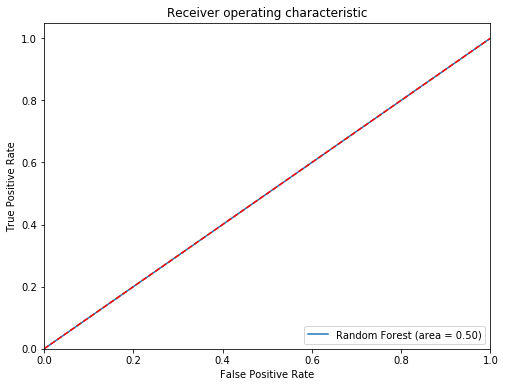

In [91]:
logit_roc_auc = roc_auc_score(y_test, pred_rf_1)
fpr, tpr, thresholds = roc_curve(y_test, clf_rf_1.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**This model could not rightly classified for 1 . So though this model gives us better accuracy but we can't except it**